## Regression
### Determining whether a dataset is appropriate for MLR and then applying LR

In [1]:
# Loading dataset
import pandas as pd

df = pd.read_csv('credit.csv')
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [2]:
# cleaning data : removing first column 
df = df.iloc[:, 1:]
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


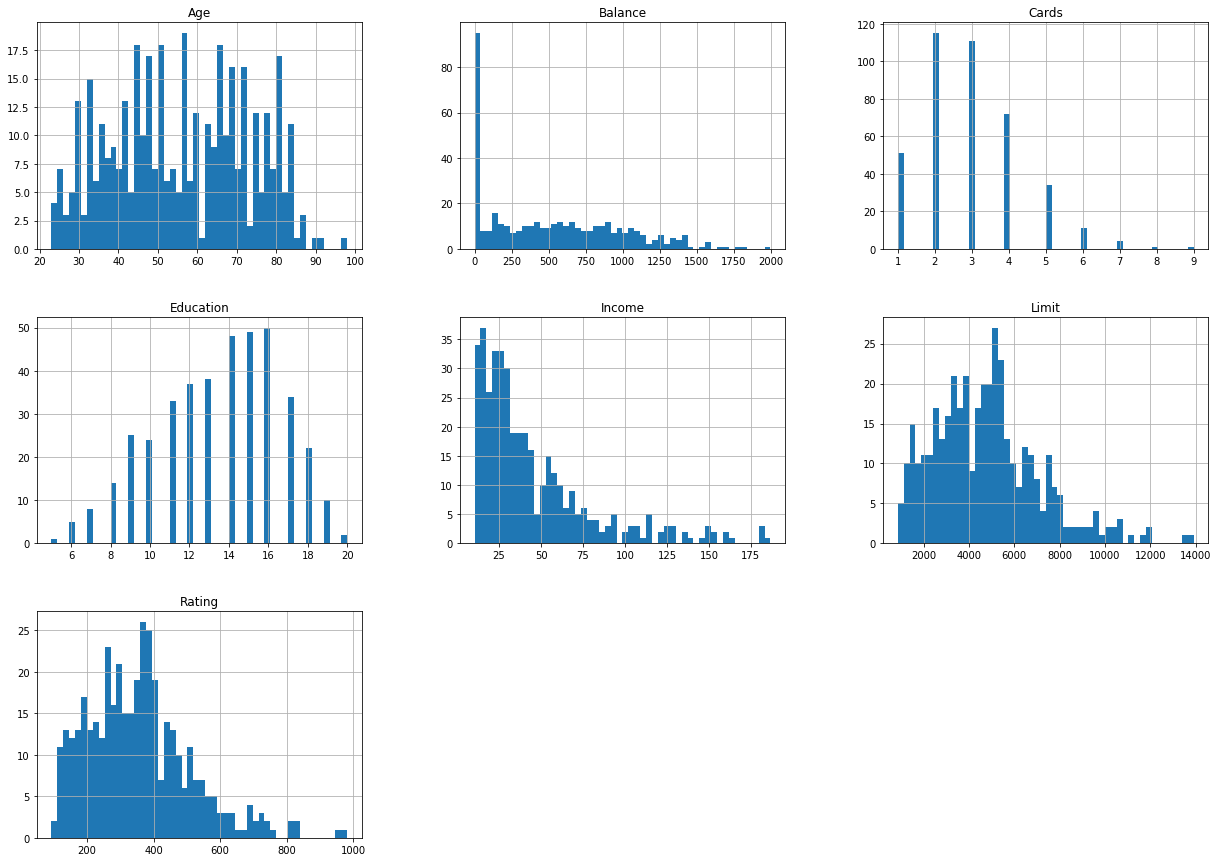

In [5]:
# understanding data set
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(21,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e0086d0>,
      dtype=object)

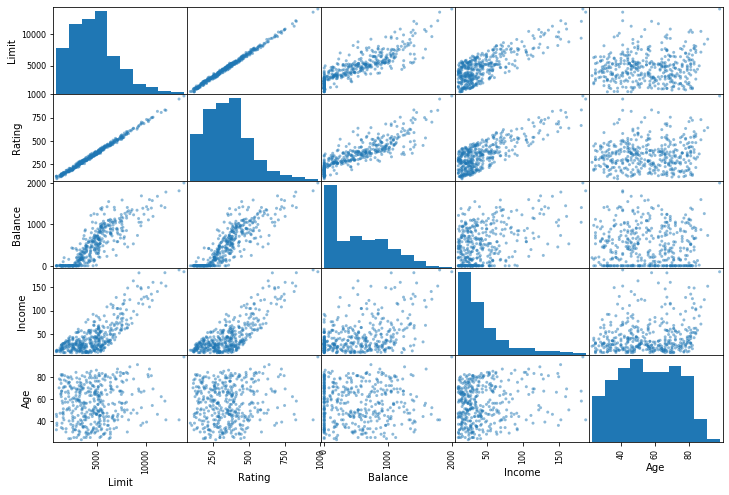

In [9]:
# Plotting scatter matrix 
from pandas.plotting import scatter_matrix

attributes = ['Limit', 'Rating', 'Balance', 'Income', 'Age']
scatter_matrix(df[attributes], figsize=(12, 8))

### We see that Limit is highly corelated to 'Rating'. And also corelated to 'Balance' and 'Income'. Age does not seem to be corelated to Limit 

In [10]:
# Checking if there are empty cells in dataset
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [12]:
# Understanding the correlation of variables to target column
corr_matrix = df.corr()
corr_matrix['Limit'].sort_values(ascending=False)
# we see that 'Rating', 'Balance', 'Income' are highly corellated to 'Limit'

Limit        1.000000
Rating       0.996880
Balance      0.861697
Income       0.792088
Age          0.100888
Cards        0.010231
Education   -0.023549
Name: Limit, dtype: float64

### Checking if the error terms properties are met to apply Linear Regression

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Rating')]

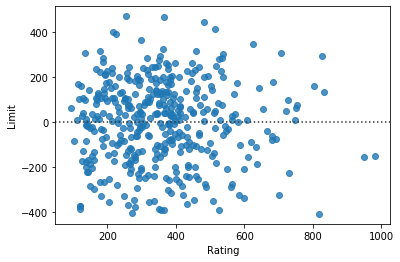

In [16]:
# Plotting Residual plot, to see properties of error terms 
import seaborn as sns

r1 = sns.residplot('Rating', 'Limit', data=df)
r1.set(xlabel='Rating', ylabel='Limit')

# We see that error terms have exoginety and homecedasticity property satisfied

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Balance')]

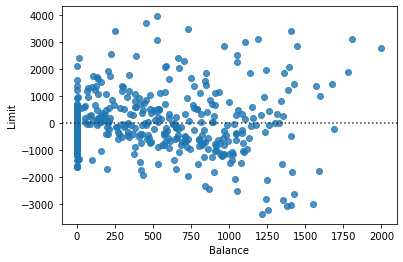

In [17]:
r1 = sns.residplot('Balance', 'Limit', data=df)
r1.set(xlabel='Balance', ylabel='Limit')

# We see that error terms have exoginety and homecedasticity property satisfied

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Income')]

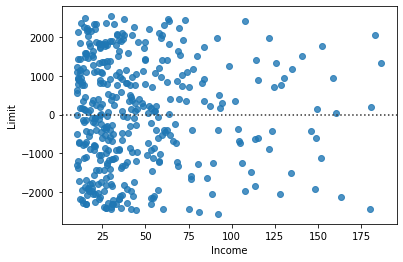

In [18]:
r1 = sns.residplot('Income', 'Limit', data=df)
r1.set(xlabel='Income', ylabel='Limit')

# We see that error terms have exoginety and homecedasticity property satisfied

In [61]:
# Let's split into train & test. This will allow us to train a model
# (on the "train" material) and give us an idea of how each model 
# will perform on unseen data ("test" material).
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [62]:
# ... and create a split:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")
# ... but because it's random, your values
# ... and instances... and later performance may vary.

320 train + 80 test


In [78]:
# Determine the targets: median_house_value for train & test
test_labels = test_set[['Limit']]
train_labels = train_set[['Limit']]
test_labels

,Limit
236,4986
113,6386
192,3933
179,7499
326,10230
...,...
184,11589
59,5294
281,1852
233,2278


In [79]:
# Determine the features which should predict our labels (for train & test)
test_features = test_set[['Rating', 'Income', 'Balance']]
train_features = train_set[['Rating', 'Income', 'Balance']]
train_features.head()

,Rating,Income,Balance
298,204,20.791,0
370,466,35.610,992
119,137,23.012,0
89,543,59.530,1176
315,296,14.479,463


In [80]:
# Applying linear regression to dataset
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_features, train_labels)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# slopes of regression line (Rating, Income and Balance) respectively.
reg.coef_

array([[14.41950792,  1.53531525,  0.06242064]])

In [82]:
# y-intercept for the regression line
reg.intercept_

array([-480.35877774])

In [83]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(test_features)
mse = mean_squared_error(test_labels, hypotheses)
print('RMSE:', np.sqrt(mse))

RMSE: 183.98939725167378


In [97]:
# regression score
reg.score(test_features,test_labels)

0.9923735000844792

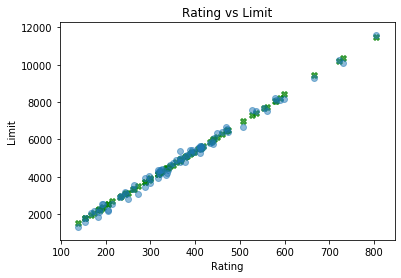

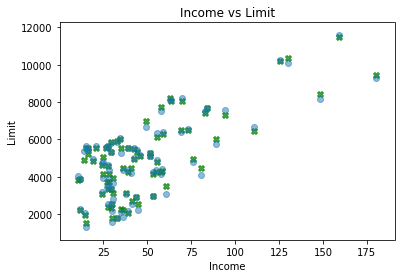

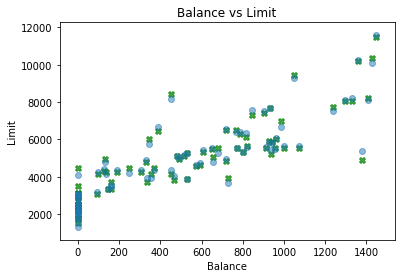

In [129]:
## Plotting regression line for test data

features = ['Rating', 'Income', 'Balance']
for feature in features:
    predictions = reg.predict(test_features)
    plt.scatter(test_features[feature], predictions, color='green', marker='X', alpha=0.7)
    plt.scatter(test_features[feature], test_labels, alpha=0.5)
    plt.title(feature + " vs Limit")
    plt.xlabel(feature)
    plt.ylabel('Limit')
    plt.show()

### In conclusion, linear regression is suitable to find relation between (Rating, Income and Balance) and Limit.